<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team2/blob/master/week5/junghwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path="/content/"

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
submission=pd.read_csv('submission.csv')

print(train.shape, test.shape, submission.shape)

(600, 12) (243, 11) (243, 2)


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [3]:
test.info()
#7번에 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [4]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        243 non-null    object
 1   box_off_num  243 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
submission.head()
#box_off_num을 예측해야 하므로 예측 타깃이 되는 box_off_num 열이 없음.(관객수)

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [8]:
#train 데이터프레임 통계정보
train.describe(include='all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.000000,600,600,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.863333,NaN,NaN,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,NaN,18.097528,NaN,NaN,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,NaN,114.000000,NaN,NaN,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05


숫자가 아닌 열: title, distributor, genre,

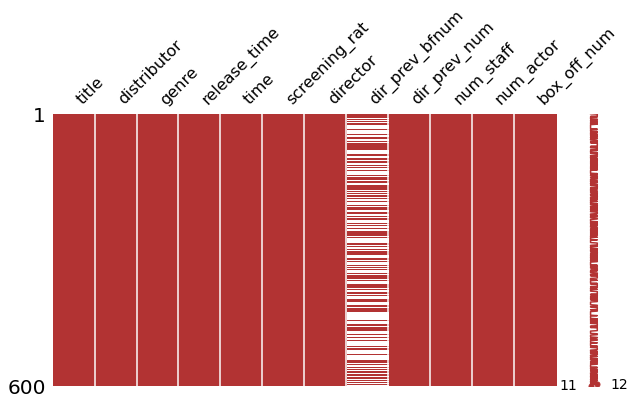

In [9]:
#결측값 확인
import missingno as msno
msno.matrix(train, figsize=(10,5),color=(0.7,0.2,0.2))
plt.show()

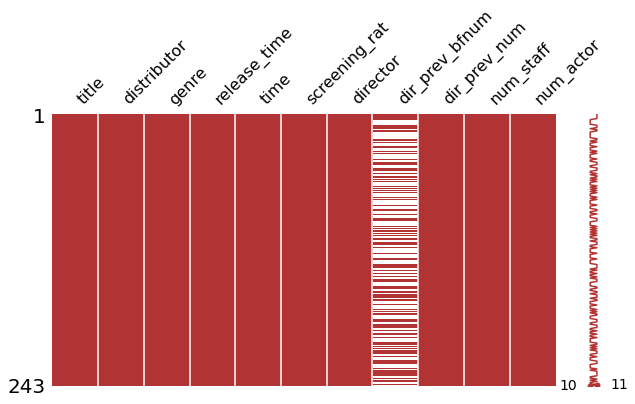

In [10]:
#matrix 함수 사용해서 어느 위치에 결측값 있는지 확인
msno.matrix(test, figsize=(10,5),color=(0.7,0.2,0.2))
plt.show()

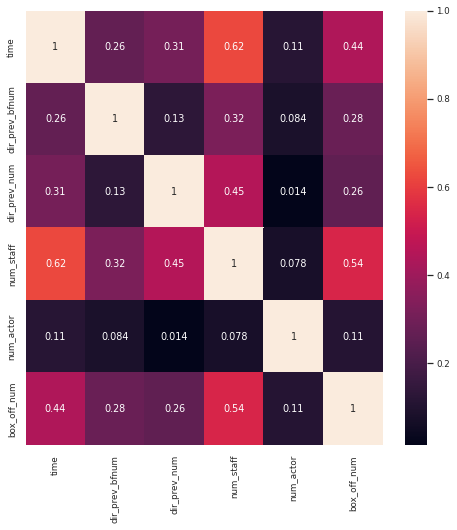

In [11]:
#히트맵으로 상관관계 분석
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(),annot=True,cbar=True);
plt.show()
#목표변수인 box_off_num과 관련이 높은 time, num_staff
#num_staff와 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
#과의 상관관계가 높음

숫자형 데이터로 구성된 열에 대해서만 상관계수 계산했음.
목표변수인 survived열과

숫자형 데이터를 가진 열을 추출하고 data_num을 만들어 저장

In [12]:
#전제 데이터셋 준비
train['TrainSplit']='Train'
test['TrainSplit']='Test'
data=pd.concat([train,test],axis=0)
print(data.shape)

(843, 13)


In [13]:
#숫자형 피처 추출
data_num=data.loc[:,['time','num_staff','num_actor','box_off_num']]
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'


#학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_features =['time','num_staff','num_actor']

X_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'box_off_num']

X_test = data_num.loc[data['TrainSplit']=='Test',selected_features]

print("Train 데이터셋 크기: ", X_train.shape, y_train.shape)
print("Test 데이터셋 크기: ", X_test.shape)

Train 데이터셋 크기:  (600, 3) (600,)
Test 데이터셋 크기:  (243, 3)


In [14]:
#훈련-검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                            shuffle=True, random_state=20)



In [15]:
#로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
Ir_model = LogisticRegression()
Ir_model.fit(X_tr, y_tr)
y_val_pred=Ir_model.predict(X_val)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<function matplotlib.pyplot.show>

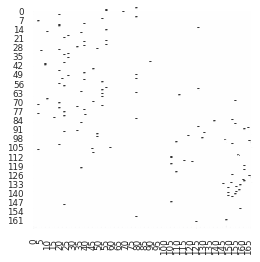

In [16]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred),annot=True,cbar=False,square=True)
plt.show

Accuracy : 0.0000


ValueError: ignored

In [24]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [25]:
#test 데이터에 대한 예측값 정리

y_test_pred = Ir_model.predict(X_test)
#제출양식에 맞게 정리
submission['box_off_num'] = y_test_pred.astype(int)
#제출파일 저장
submission_filepath = drive_path + 'baseline_num_Ir_submission_001.csv'
submission.to_csv(submission_filepath, index=False)
submission.head(5)

,title,box_off_num
0,용서는 없다,346483
1,아빠가 여자를 좋아해,346483
2,하모니,12983841
3,의형제,386074
4,평행 이론,956103
